# Counting Words, er, Tokens

Now that we understand what it means to tokenize a string into a list of words, we want to explore the various ways we can do that. While it seem strange not to use an already available function like `nltk.tokenize.word_tokenize`, there will be moments in which you would like to have more control of how strings get split in lists of tokens. E.g., I often prefer to keep contractions together in my analyses, and so I prefer to tokenize using a `regex` expression. As we will see both here in the third section which uses functionality available in **pandas**, there are a number of libraries that handle tokenization. Having a better idea of how this works gives you more control of the process which allows you more say in the nature of the data.

There are many ways to create a frequency list. Three are below: using built-in functions, using the `nltk`, and using `pandas`. 

<div class="alert alert-block alert-info">
<b>Note:</b> In each of the sections that follow, I import the libraries as needed. In general, I will develop notebooks in this fashion, but as I continue to work, I tend to migrate all imports to the top of the notebook so that when someone else uses the notebook they can see at a glance what libraries they will need. 
</div>

*If you want to know how to get these colored "callout" boxes, see [IBM's markdown guide](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).*

In [3]:
# Imports
import re

# Open and read the file to create a string object
with open("../data/mdg.txt", mode="r") as f:
    mdg_string = f.read()

<div class="alert alert-block alert-warning">
We have replaced the simple but terrible <code>open</code> above with a much more Pythonic <code>with</code> statement, which has the advantage of automatically closing the file once you have read it into an object.</div>

We are creating only one `string` object which we will then tokenize using the three approaches below.

Before we go any further, let's check to make sure that the object we created above is as expected. In the previous notebooks, I often called both the `type()` and `print()` functions, but in practice I typically simply use the latter: if something doesn't print or prints in an unexpected fashion, that tells me I need to take a look at my code.

Note that I am using the slice method on a string -- you see this far more often with lists, but it works here to limit the amount of text returned. We don't need to see all the characters, just some number of them. Since plain text files conventionally have line lengths of either 72 or 80 columns (or characters), I just choose the arbitrary number of 50 so the output fits on one line.

In [5]:
# Check our work
print(mdg_string[0:50])

"Off there to the right -- somewhere -- is a large


### Built-In

`import re` tells Python to import the **regex** library, which comes standard with Python itself. (There are a number of default modules: check the documentation to see just how much you get with just the base install!)

**regex* is short for *regular expressions, which is as close to voodoo as you can get. No matter what programming language you use, if you deal with texts, you will inevitably have to work up some regular expression or another. It is not easy. (I have two books on it, and I still use sites like [regexr](https://regexr.com)) to figure out what I'm doing. I'm told a number of the LLMs are pretty good at it. Try any/all approaches. 

Let's first try this code and then we will unpack it.

In [ ]:
# Imports
import re

# Let regex do the heavy lifting:
mdg_words = re.sub("[^a-zA-Z']"," ", mdg_string).lower().split()


Not all code blocks are going to be explained, but it might be useful to understand what is happening with `re.sub()` above. *There's a lot happening there!*

First, you need to remember that all libraries come with a variety of functions -- that's what makes them libraries! When you import a library, you import all its functions, which are themselves contained within its *name space*. That means you can't simply call a function without first telling Python what library it is found within. Thus, if we want to use regex to **substitute** certain characters for other characters, we have to call the corresponding function. 

`re.sub()` takes three arguments: what you want it to find, what you want to substitute, and what object you want it to do this to. In the line above, we are telling `re.sub()` that we want to find all instances of characters that are not lowercase letters and not uppercase letters and not an apostrophe, that we want to substitute those non-letters and apostrophes for a space, and that we want to do this to the mdg_string object.

Having done that, we then simply lowercase everything and then split on the spaces. *Ta da!*

In [12]:
# Check our results:
print(type(mdg_words))
print(mdg_words[0:5])

<class 'list'>
['off', 'there', 'to', 'the', 'right']


Okay, we have words or, rather, tokens. Now we would like to go through the text to see how many of each of those tokens we have. The easiest way to do that is to ask Python to create a dictionary, and then to add 1 to its count if the word is already in the dictionary or to start a count of 1 if it is not. (And that is exactly what the `for` loop below does.)

In [13]:
# Using a dictionary
mdg_dict = {}
for word in mdg_words:
    try:
        mdg_dict[word] += 1
    except: 
        mdg_dict[word] = 1

# When in doubt print something out
print(f"mdg_dict is a {type(mdg_dict)} of {len(mdg_dict)} entries (tokens).")

mdg_dict is a <class 'dict'> of 1947 entries (tokens).


Dictionaries are not slice-able like lists, so if we wanted to see inside the dictionary `print(mdg_dict[0:10])` would not work. Dictionaries are made up of key, valye pairs and look like this:

a_dictionary { "key1":"value1", "key2", "value2"}

- Strings are indicated by quotation marks, single **' '** or double **" "**.
- Lists are indicated by square brackets **[ ]**.
- Dictionaries are indicated by curly braces **{ }**.

We have already seen these data types, the other oft-used basic data structure in Python, as least in this line of work, is the tuple, whose key feature is that, unlike strings, dictionaries, and lists, it is immutable. (You will want to look that up to understand what that means.) Of course, as you have already begun to understand, all of these data structures, or objects, can contain other data structures within them. So far we have created strings from text files and then we have created lists of strings, or substrings if you prefer, from those strings. Now you are seeing dictionaries using strings for keys and integers for values.

*Oh, yes, **integers** and **floats** are also object types in Python, along with Booleans (**`True`** and **`False`**).*

In [15]:
# To retrieve a value, enter the key:
mdg_dict["hunter"]

11

<div class="alert alert-block alert-success">
Substitute other words from "The Most Dangerous Game" in the code above to see their counts. Try, for example, "the."
</div>

In [4]:
# Knowing this, you can actually get the most frequent tokens. 
# (This is not suggested as it's difficult to read.)
# What would you change to get the least frequent tokens?
for word in sorted(mdg_dict, key=mdg_dict.get, reverse=False)[0:10]:
    print(word, mdg_dict[word])

mystery 1
charts 1
'ship-trap 1
replied 1
suggestive 1
superstition 1
peer 1
dank 1
tropical 1
palpable 1


### pandas

This is my preferred way, for a variety of reasons, and I'm going to show it to you quickly and without much explanation just for reference before proceeding to walk through the `nltk` code.

In [5]:
# First import the pandas library
import pandas as pd

# Then use my preferred way to turn a string of words into a list of words
words = re.sub("[^a-zA-Z']"," ", mdg_string).lower().split()

# Then create a pandas series
mdg_series = pd.Series(words)

# pandas series are a particular data structure
mdg_series.head()

0      off
1    there
2       to
3      the
4    right
dtype: object

In [6]:
mdg_series.shape

(8017,)

In [7]:
mdg_counts = mdg_series.value_counts()
print(mdg_counts[0:5])

the    512
a      258
he     248
of     172
and    164
Name: count, dtype: int64


In [8]:
mdg_counts.shape

(1947,)

<Axes: >

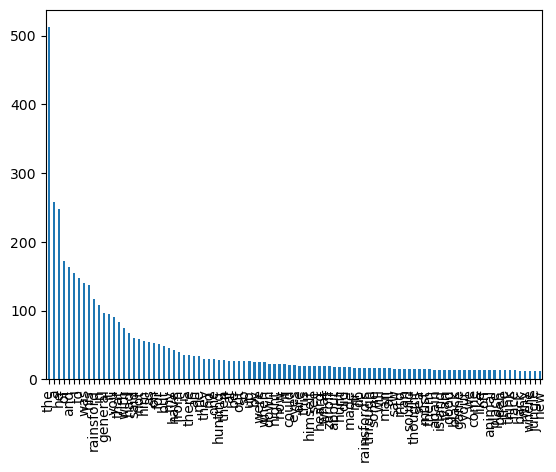

In [9]:
# pandas makes certain kinds of graphing very easy
mdg_counts.iloc[0:99].plot(kind='bar')

In [10]:
# One of the niceties of working with pandas
mdg_counts.to_csv("mdg-counts.csv")

### NLTK

There are two ways forward: using only NLTK functions or, in the second cell below, combining using preferred word list with the NLTK's `FreqDist` functionality.

In [11]:
fdist = nltk.FreqDist()
for sentence in nltk.tokenize.sent_tokenize(mdg_string):
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist[word] += 1

fdist.most_common(10)

[('.', 640),
 (',', 556),
 ('the', 439),
 ('a', 246),
 ('``', 223),
 ("''", 210),
 ('I', 178),
 ('he', 173),
 ('of', 171),
 ('and', 155)]

In [12]:
mdg_dist = nltk.FreqDist()
for word in words:
    mdg_dist[word] +=1

mdg_dist.most_common(10)

[('the', 512),
 ('a', 258),
 ('he', 248),
 ('of', 172),
 ('and', 164),
 ('i', 155),
 ('to', 148),
 ('was', 140),
 ('his', 137),
 ('rainsford', 117)]

In [13]:
# If you ask Python what kind of data structure freq_dist is,
# you'll get a rather unhelpful response, but LOOK ABOVE. What do you see?
type(mdg_dist)

nltk.probability.FreqDist

In [14]:
# We can work with freq_dist like any list of tuples

for word, frequency in mdg_dist.most_common(10):
    print(f"{word}:  {frequency}")

the:  512
a:  258
he:  248
of:  172
and:  164
i:  155
to:  148
was:  140
his:  137
rainsford:  117


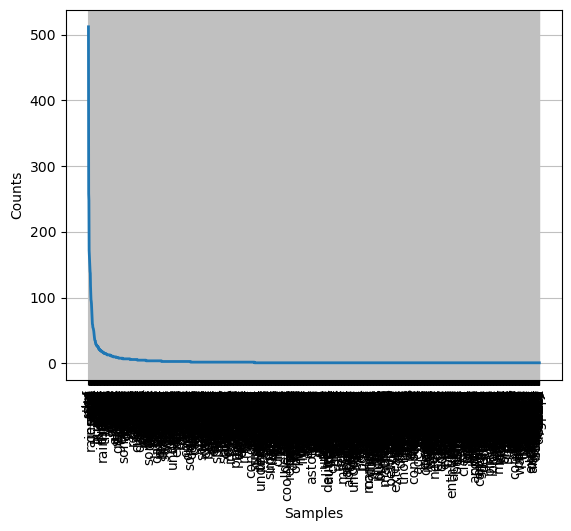

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# freq_dist comes with a lot of functionality
# (See Table 3.1 in Chapter 1 of the NLTK book for more ideas.)

mdg_dist.plot()

# More Texts, More Words

### Lexical Diversity

In [16]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv


In [19]:
# Note how you can run a function inside an f-string.
# Also note the use of backslashes to escape the quotation marks.
print(f"The lexical diversity of \"The Most Dangerous Game\" is {lex_div(mdg_words):.3f}")

The lexical diversity of "The Most Dangerous Game" is 0.195


In [21]:
print(f"The lexical diversity of \"Heart of Darkness\" is {lex_div(hod_words):.3f}")

The lexical diversity of "Heart of Darkness" is 0.124


In [22]:
# We need a more robust function to handle a series of files
def lex_div(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / len (the_words)
    # return this percentage
    return lexdiv

In [23]:
data = ["A", "B", "C", "D", "E", "F", "G", "H"]

for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    print(f"{i}: {lexdiv:.3f}")

A: 0.326
B: 0.308
C: 0.233
D: 0.283
E: 0.237
F: 0.284
G: 0.259
H: 0.246


*Hmmm* ... that's quite a range. Referring to the lexical diversities for "The Most Dangerous Game" and _Heart of Darkness_, what do you think is at work there? 

What happens if we add a text as a data point?

In [24]:
hamlet = "../data/hamlet.txt"
lex_div(hamlet)

0.13837755875663382

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Write code that explores the possible dimension in play here.
</div>

## Leftover Code

```python
# Create a list of substrings, aka words
mdg_words = nltk.tokenize.word_tokenize(mdg_string.lower())

# Repeat for "Heart of Darkness"
hod_string = open('../data/hod.txt', 'r').read()
hod_words = nltk.tokenize.word_tokenize(hod_string.lower())
```